# NLP Disaster Tweets Kaggle Mini-Project

Viacheslav Sergeev <viacheslav.sergeev@colorado.edu>

University of Colorado Boulder

**Source**: https://www.kaggle.com/c/nlp-getting-started/overview

## Problem

The Kaggle "Natural Language Processing with Disaster Tweets" problem is about figuring out if a tweet is talking about a real disaster or not. It's a task where the tweet is given, and the goal is to say if it's about a disaster (1) or not (0). The hard part is that tweets are short and sometimes messy, with slang, emojis, and unclear language.


## Data Description

(from Kaggle)

Each sample in the train and test set has the following information:

The text of a tweet
A keyword from that tweet (although this may be blank!)
The location the tweet was sent from (may also be blank)
What am I predicting?
You are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.

Files
train.csv - the training set
test.csv - the test set
sample_submission.csv - a sample submission file in the correct format
Columns
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the - tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [4]:
!mkdir -p /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle/kaggle.json
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 40.5MB/s]


In [5]:
import zipfile
import os

with zipfile.ZipFile('nlp-getting-started.zip', 'r') as zip_ref:
  zip_ref.extractall('dataset')

In [6]:
import pandas as pd

train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
print(len(train), len(test))
train.head()

7613 3263


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

In this section I use basic overall analysis of the data, but main focus is to look at the distribution of frequency for words.

## Basic Analysis

In this section I'm trying to understand how the data is filled and balanced, get some base stats

In [7]:
print('train, test size: ', len(train), len(test))

# for EDA we are not interested in train/test split but want to look at full dataset
full_df = pd.concat([train, test], axis=0)

print('full df size', len(full_df))

# for correlation with label we will use only with targets
# its probably train data but for proper analysis we need this explicitly
df_labels = full_df[~full_df['target'].isna()]

print('with labels', len(df_labels))

with_keywords = df_labels[~df_labels['keyword'].isna()]

print('with labels and keyword', len(with_keywords))

no_label_but_keyw = full_df[~(full_df['keyword'].isna()) & (full_df['target'].isna())]
print('no keywoard but label ', len(no_label_but_keyw))

train, test size:  7613 3263
full df size 10876
with labels 7613
with labels and keyword 7552
no keywoard but label  3237


In [8]:
print(full_df.describe())
full_df.head()

                 id      target
count  10876.000000  7613.00000
mean    5437.500000     0.42966
std     3139.775098     0.49506
min        0.000000     0.00000
25%     2718.750000     0.00000
50%     5437.500000     0.00000
75%     8156.250000     1.00000
max    10875.000000     1.00000


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [9]:
print(df_labels.describe())
df_labels.head()

                 id      target
count   7613.000000  7613.00000
mean    5441.934848     0.42966
std     3137.116090     0.49506
min        1.000000     0.00000
25%     2734.000000     0.00000
50%     5408.000000     0.00000
75%     8146.000000     1.00000
max    10873.000000     1.00000


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [10]:
print(with_keywords.describe())
with_keywords.head()

                 id       target
count   7552.000000  7552.000000
mean    5442.680614     0.427569
std     3111.921912     0.494759
min       48.000000     0.000000
25%     2759.750000     0.000000
50%     5408.500000     0.000000
75%     8126.500000     1.000000
max    10834.000000     1.000000


,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1.0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0.0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1.0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0.0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0.0


In [11]:
print(test.describe())
test.head()

                 id
count   3263.000000
mean    5427.152927
std     3146.427221
min        0.000000
25%     2683.000000
50%     5500.000000
75%     8176.000000
max    10875.000000


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## Frequency Data Analysis Preprocessing

In this section I calculate frequencies for every word. Also, I calculate frequencies in 0/1 targets and relative frequency to see if some word is more frequently appears in some specific target trying to use this as kinda preidctor.

In [12]:
clean = train.drop(['id', 'keyword', 'location'],axis=1)
clean = clean[~clean['target'].isna()]
print(clean)

                                                   text  target
0     Our Deeds are the Reason of this #earthquake M...       1
1                Forest fire near La Ronge Sask. Canada       1
2     All residents asked to 'shelter in place' are ...       1
3     13,000 people receive #wildfires evacuation or...       1
4     Just got sent this photo from Ruby #Alaska as ...       1
...                                                 ...     ...
7608  Two giant cranes holding a bridge collapse int...       1
7609  @aria_ahrary @TheTawniest The out of control w...       1
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  Police investigating after an e-bike collided ...       1
7612  The Latest: More Homes Razed by Northern Calif...       1

[7613 rows x 2 columns]


In [13]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

class EDAFrequencyAnalysis:
  def __init__(self):
    self.vectorizer = CountVectorizer(stop_words='english')

  def preprocess(self, df: pd.DataFrame):
    # Preprocessing the text: Tokenize and remove punctuation
    X = self.vectorizer.fit_transform(df['text'])
    return X

  def get_freqs(self, X):
    # Get word frequencies
    word_counts = pd.DataFrame(
        X.toarray(),
        columns=self.vectorizer.get_feature_names_out()
    )
    df_word_counts = word_counts.sum(axis=0).reset_index()
    df_word_counts.columns = ['word', 'basic_frequency']
    return df_word_counts

  def freq_01(self, df: pd.DataFrame):
    # Calculate word frequencies for target=0 and target=1
    df_target_0 = df[df['target'] == 0]
    df_target_1 = df[df['target'] == 1]
    return df_target_0, df_target_1

  def target_freq(self, df_target_df, target=0):
    X_0 = self.vectorizer.transform(df_target_df['text'])
    word_counts_0 = pd.DataFrame(X_0.toarray(), columns=self.vectorizer.get_feature_names_out())
    df_word_counts_0 = word_counts_0.sum(axis=0).reset_index()
    df_word_counts_0.columns = ['word', f'frequency_in_{target}']
    return df_word_counts_0

  def run(df: pd.DataFrame) -> pd.DataFrame:
    ...


eda = EDAFrequencyAnalysis()
X = eda.preprocess(clean)
df_word_counts = eda.get_freqs(X)
df0, df1 = eda.freq_01(clean)
df_word_counts_0 = eda.target_freq(df0,0)
df_word_counts_1 = eda.target_freq(df1,1)

df_final = df_word_counts.merge(df_word_counts_0, on='word', how='left').merge(df_word_counts_1, on='word', how='left')

total_words = df_final['basic_frequency'].sum()

df_final['frequency_in_0'].fillna(0, inplace=True)
df_final['frequency_in_1'].fillna(0, inplace=True)

df_final['basic_frequency'] = (df_final['basic_frequency'] / total_words) * 100
df_final['frequency_in_0'] = (df_final['frequency_in_0'] / total_words) * 100
df_final['frequency_in_1'] = (df_final['frequency_in_1'] / total_words) * 100

df_final['diff_freq_in_0'] = df_final['basic_frequency'] - df_final['frequency_in_0']
df_final['diff_freq_in_1'] = df_final['basic_frequency'] - df_final['frequency_in_1']

df_final.head()

<ipython-input-13-be30d04f4961>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['frequency_in_0'].fillna(0, inplace=True)
<ipython-input-13-be30d04f4961>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,word,basic_frequency,frequency_in_0,frequency_in_1,diff_freq_in_0,diff_freq_in_1
0,00,0.043058,0.010438,0.032620,0.032620,0.010438
1,000,0.005219,0.003914,0.001305,0.001305,0.003914
2,0000,0.001305,0.000000,0.001305,0.001305,0.000000
3,007npen6lg,0.001305,0.000000,0.001305,0.001305,0.000000
4,00cy9vxeff,0.001305,0.001305,0.000000,0.000000,0.001305


In [14]:
df_final.sort_values(by='basic_frequency', ascending=False)

,word,basic_frequency,frequency_in_0,frequency_in_1,diff_freq_in_0,diff_freq_in_1
9192,http,5.622317,2.514320,3.107997,3.107997,2.514320
9193,https,0.536266,0.361425,0.174841,0.174841,0.361425
11323,like,0.454065,0.331415,0.122650,0.122650,0.331415
21307,û_,0.454065,0.229642,0.224423,0.224423,0.229642
1939,amp,0.448846,0.272700,0.176146,0.176146,0.272700
...,...,...,...,...,...,...
9730,inmates,0.001305,0.000000,0.001305,0.001305,0.000000
1515,acenewsdesk,0.001305,0.000000,0.001305,0.001305,0.000000
9733,innings,0.001305,0.001305,0.000000,0.000000,0.001305
9734,innit,0.001305,0.001305,0.000000,0.000000,0.001305


In [15]:
df_final.sort_values(by='basic_frequency', ascending=True)

,word,basic_frequency,frequency_in_0,frequency_in_1,diff_freq_in_0,diff_freq_in_1
21362,ûówe,0.001305,0.000000,0.001305,0.001305,0.000000
11694,lzljzzkcfa,0.001305,0.001305,0.000000,0.000000,0.001305
11695,lzml1xb2nh,0.001305,0.000000,0.001305,0.001305,0.000000
11696,lzob8qoh1b,0.001305,0.000000,0.001305,0.001305,0.000000
11697,lzxwoaye4x,0.001305,0.000000,0.001305,0.001305,0.000000
...,...,...,...,...,...,...
1939,amp,0.448846,0.272700,0.176146,0.176146,0.272700
21307,û_,0.454065,0.229642,0.224423,0.224423,0.229642
11323,like,0.454065,0.331415,0.122650,0.122650,0.331415
9193,https,0.536266,0.361425,0.174841,0.174841,0.361425


In [20]:

print(len(df_final))

21363


## "Long-tail" Words Frequency Distribution Analysis

I analyze frequencies in the context of long-tail (statistics) that is typical for NLP.

https://en.wikipedia.org/wiki/Long_tail

We are not interested in very common words (first part of the tail) and not interested in words that appear very rarely (noise) and looking for 2 points to cut this distribution and focus analysis on the most valuable words.

In [21]:
import matplotlib.pyplot as plt

def plot_freq(min_freq=0.03, max_freq=None):
  df_final_ = df_final
  if min_freq is not None:
    df_final_ = df_final[df_final['basic_frequency'] > min_freq]

  if max_freq is not None:
    df_final_ = df_final[df_final['basic_frequency'] < max_freq]

  df_sorted = df_final_.sort_values(by='basic_frequency', ascending=False)
  plt.figure(figsize=(10, 6))
  plt.plot(df_sorted['word'], df_sorted['basic_frequency'],
           marker='o', color='skyblue', linestyle='-')
  plt.title('Word Frequency Distribution')
  plt.xlabel('Word')
  plt.ylabel('Basic Frequency')
  plt.xticks([])
  plt.tight_layout()

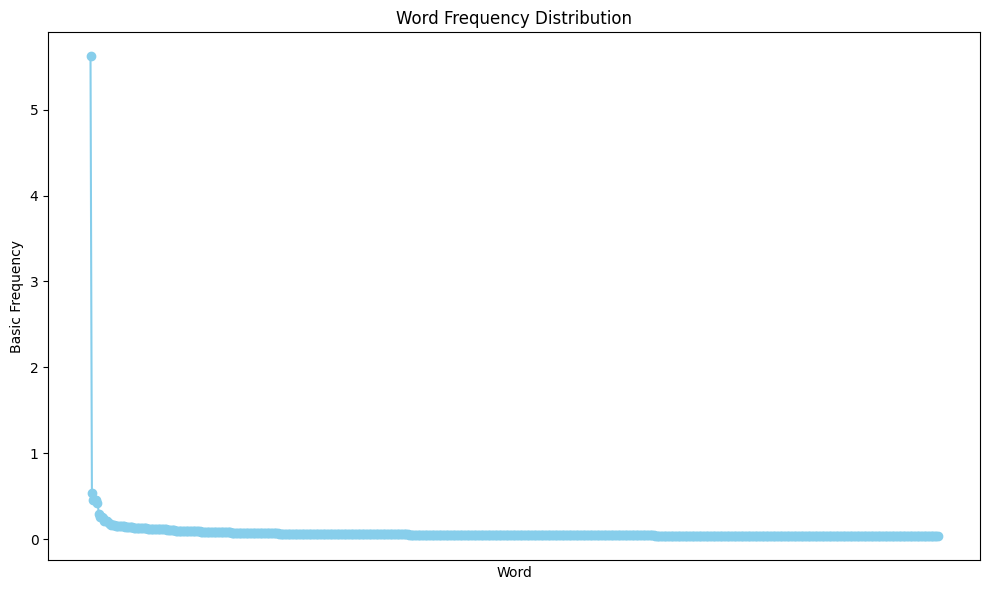

In [22]:
plot_freq()

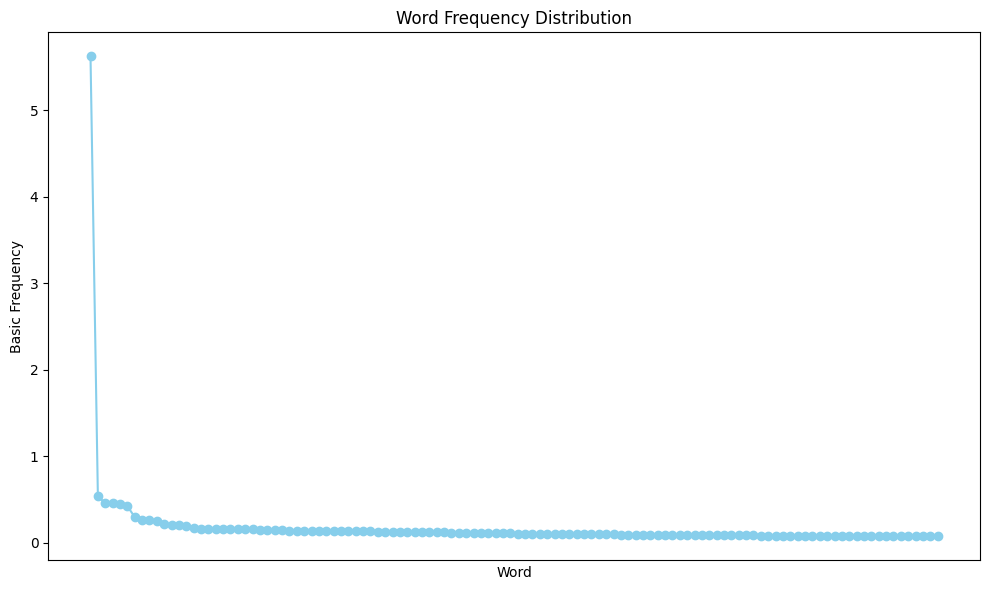

In [23]:
plot_freq(min_freq=0.07)

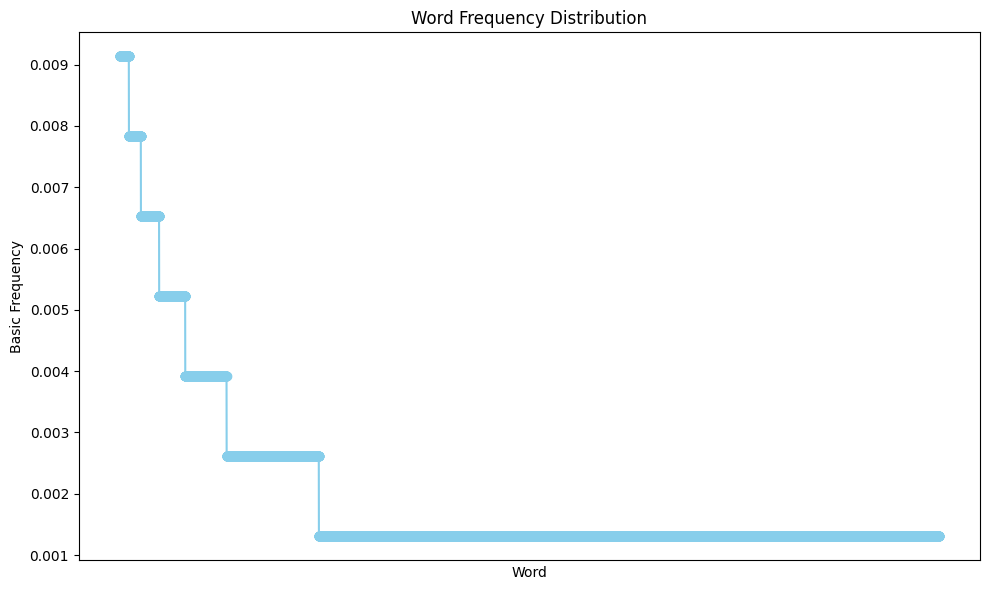

In [24]:
plot_freq(min_freq=0.05, max_freq=0.01)

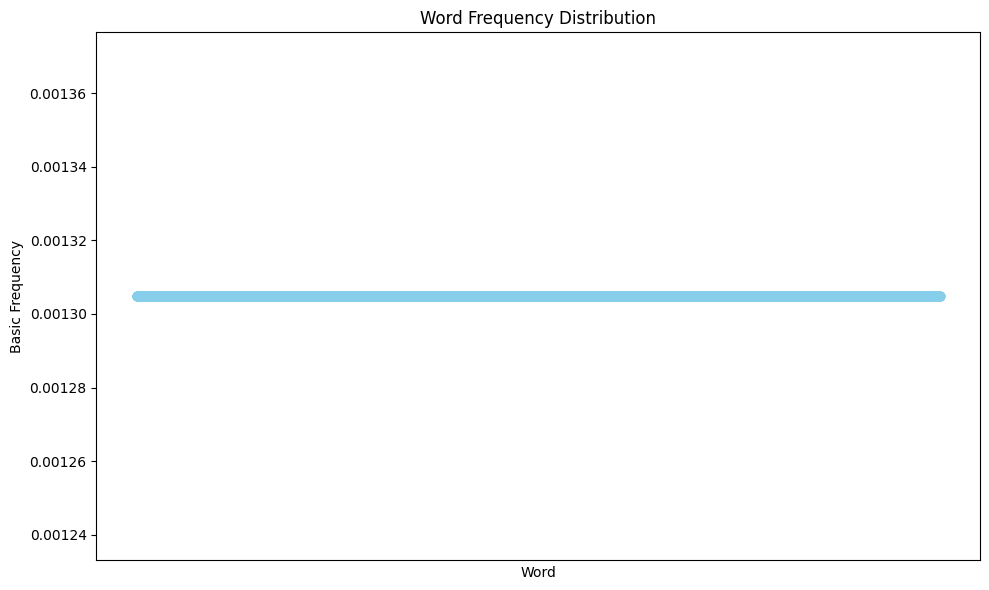

In [25]:
plot_freq(min_freq=0.001, max_freq=0.002)

In [26]:
freq = df_final[df_final['basic_frequency'] > 0.001]
freq = freq[freq['basic_frequency'] < 0.002]
freq

,word,basic_frequency,frequency_in_0,frequency_in_1,diff_freq_in_0,diff_freq_in_1
2,0000,0.001305,0.000000,0.001305,0.001305,0.000000
3,007npen6lg,0.001305,0.000000,0.001305,0.001305,0.000000
4,00cy9vxeff,0.001305,0.001305,0.000000,0.000000,0.001305
5,00end,0.001305,0.001305,0.000000,0.000000,0.001305
6,00pm,0.001305,0.000000,0.001305,0.001305,0.000000
...,...,...,...,...,...,...
21358,ûóher,0.001305,0.000000,0.001305,0.001305,0.000000
21359,ûókody,0.001305,0.000000,0.001305,0.001305,0.000000
21360,ûónegligence,0.001305,0.000000,0.001305,0.001305,0.000000
21361,ûótech,0.001305,0.001305,0.000000,0.000000,0.001305


In [27]:
freq = df_final[df_final['diff_freq_in_1'] > 0.001]
freq = freq[freq['basic_frequency'] < 0.002]
freq

,word,basic_frequency,frequency_in_0,frequency_in_1,diff_freq_in_0,diff_freq_in_1
4,00cy9vxeff,0.001305,0.001305,0.0,0.0,0.001305
5,00end,0.001305,0.001305,0.0,0.0,0.001305
9,0215,0.001305,0.001305,0.0,0.0,0.001305
15,034,0.001305,0.001305,0.0,0.0,0.001305
17,03l7nwqdje,0.001305,0.001305,0.0,0.0,0.001305
...,...,...,...,...,...,...
21343,ûïparties,0.001305,0.001305,0.0,0.0,0.001305
21344,ûïplans,0.001305,0.001305,0.0,0.0,0.001305
21346,ûïsippin,0.001305,0.001305,0.0,0.0,0.001305
21356,ûòåêcnbc,0.001305,0.001305,0.0,0.0,0.001305


In [28]:
freq[freq['diff_freq_in_1'] > 0.0013]

,word,basic_frequency,frequency_in_0,frequency_in_1,diff_freq_in_0,diff_freq_in_1
4,00cy9vxeff,0.001305,0.001305,0.0,0.0,0.001305
5,00end,0.001305,0.001305,0.0,0.0,0.001305
9,0215,0.001305,0.001305,0.0,0.0,0.001305
15,034,0.001305,0.001305,0.0,0.0,0.001305
17,03l7nwqdje,0.001305,0.001305,0.0,0.0,0.001305
...,...,...,...,...,...,...
21343,ûïparties,0.001305,0.001305,0.0,0.0,0.001305
21344,ûïplans,0.001305,0.001305,0.0,0.0,0.001305
21346,ûïsippin,0.001305,0.001305,0.0,0.0,0.001305
21356,ûòåêcnbc,0.001305,0.001305,0.0,0.0,0.001305


# Model Building, Training, and Optimization

## Training & Evaluation

In [48]:
# I used this notebook to find ideas of what models to try
# https://www.kaggle.com/code/irudunoghenaosiseh/nlp-with-disaster-tweets

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

X, y = train['text'], train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
tfidf = TfidfVectorizer(max_features=3000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)


models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}

predictions = {}
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    predictions[name] = model.predict(X_val_tfidf)
    f1 = f1_score(y_val, predictions[name])
    results[name] = {
        'f1_score': f1
    }
    print(f"Model: {name}")
    print(f"f1_score: {results[name]['f1_score']:.4f}")
    print(' ')


Model: Random Forest
f1_score: 0.7190
 
Model: Gradient Boosting
f1_score: 0.6827
 
Model: K-Nearest Neighbors
f1_score: 0.3793
 
Model: Decision Tree
f1_score: 0.6455
 


## Hyperparameters Optimization

I use grid search with cross validation to optimize the best model.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_tfidf)

f1_best = f1_score(y_val, y_pred_best)
print(f"Best Random Forest Model F1 Score: {f1_best:.4f}")

print(classification_report(y_val, y_pred_best))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'max_depth': None, 'n_estimators': 100}
Best Random Forest Model F1 Score: 0.7293
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       883
           1       0.82      0.65      0.73       640

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.78      1523
weighted avg       0.80      0.80      0.79      1523



## Result: Submit to Kaggle - Score: 0.55562 - 905 in the leaderboard

i save predictions and submit them using Kaggle API.

In [46]:
X_submit = tfidf.fit_transform(test['text'])
submission = pd.DataFrame({
    'id': test['id'],
    'target': best_model.predict(X_submit)
})
submission.to_csv('submission.csv', index=False)

In [47]:
!kaggle competitions submit -c nlp-getting-started -f submission.csv -m "Submission"

100% 22.2k/22.2k [00:00<00:00, 104kB/s]
Successfully submitted to Natural Language Processing with Disaster Tweets

# Conclusion

In this project I tried to predict if tweets are about real disasters. I looked at how frequently some words appear but this didn't help as much as I expected.

I used simple model to make oredictions. The model works ok and placed at 905 on the Kaggle leaderboard with score of 0.55562. Good, but not perfect.

It's possible to improve the model using more advanced models, transformers. Better data cleaning and analysis could help to.